In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [19]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')

In [20]:
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [21]:
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
dataframe.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [23]:
dataframe.shape

(1599, 12)

In [24]:
dataframe.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
dataframe.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [26]:
dataframe.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

checked & found there is two type of data present is dataset.

In [27]:
dataframe.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [28]:
dataframe.isnull().sum().sum()

0

In [29]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

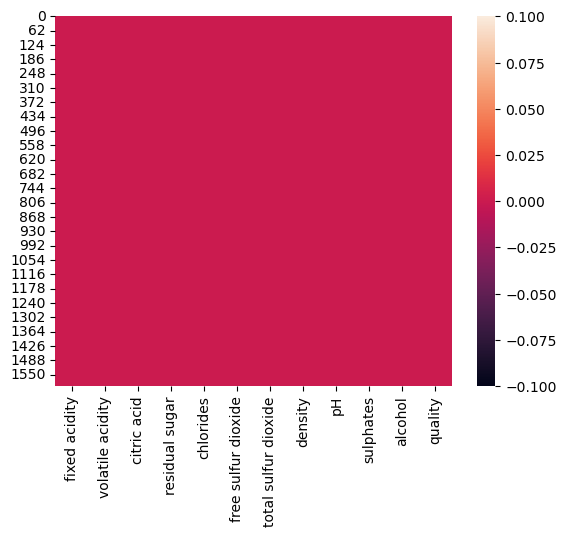

In [30]:
sns.heatmap(dataframe.isnull())

In [31]:
dataframe['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

In [32]:
dataframe['alcohol'].nunique()

65

In [33]:
for i in dataframe.columns:
    print(dataframe[i].value_counts())
    print('\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

per above dataset no blank space found

In [34]:
dataframe.loc[dataframe['alcohol']==' ']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [36]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No need to signify cotagerocial columns or Numercial column as there is numercial data

In [38]:
dataframe.describe()  method used to get staistical summary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1- As per my observation the  mean value is greater than median it means data is right skewed.
2- There is big gap between between 75% and Max value
 All these indicate that there is oulier 

In [39]:
dataframe.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

skewd range is +/-0.05 out targest variable is Quality now we can start visulisation

In [61]:
cor = dataframe.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.057960,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.201444,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.108961,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.039035,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.225791,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.070682,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.213596,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.490949,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.206209,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093669,0.251397


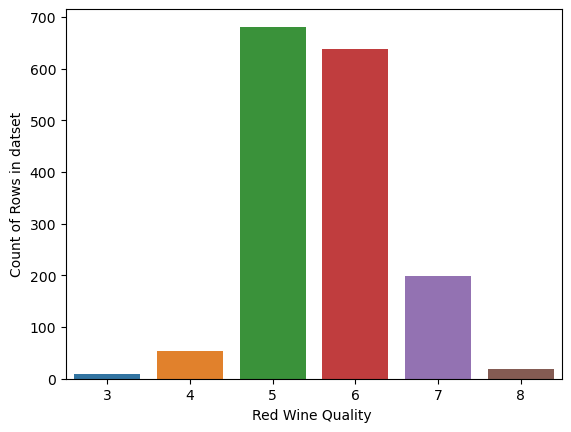

In [42]:
sns.countplot(x='quality',data=dataframe)
plt.xlabel('Red Wine Quality ')
plt.ylabel('Count of Rows in datset')
plt.show()

Above representation found that 5 & 6 red wine quality is higher than other, So there is imbalance in dataset that we need to fix.

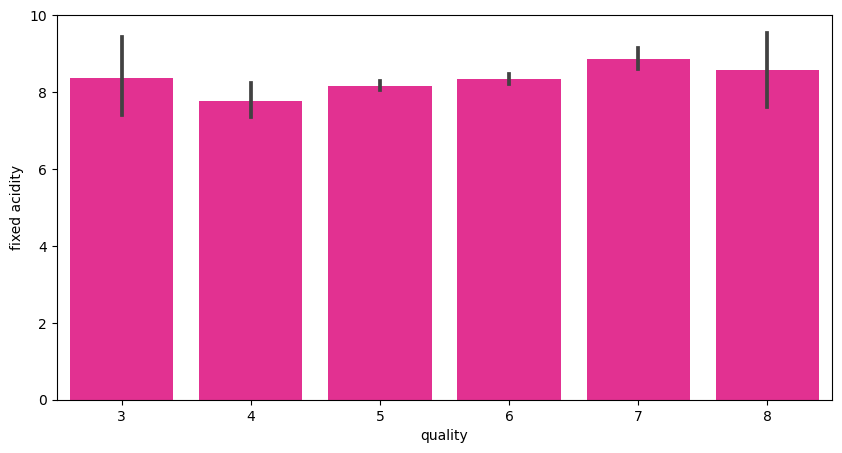

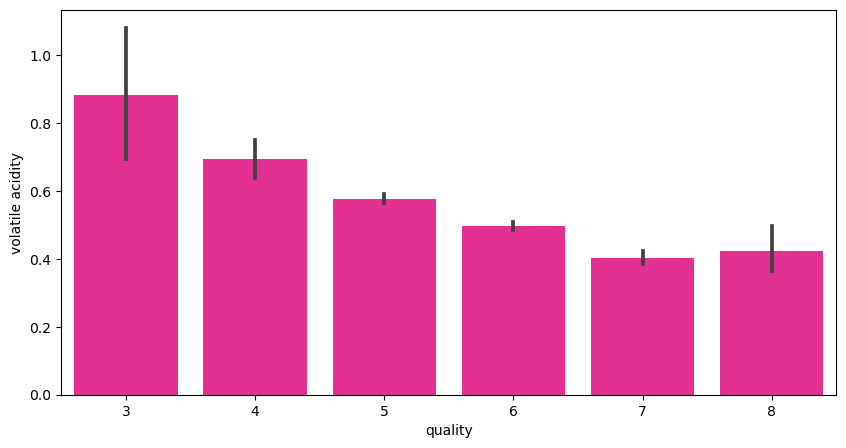

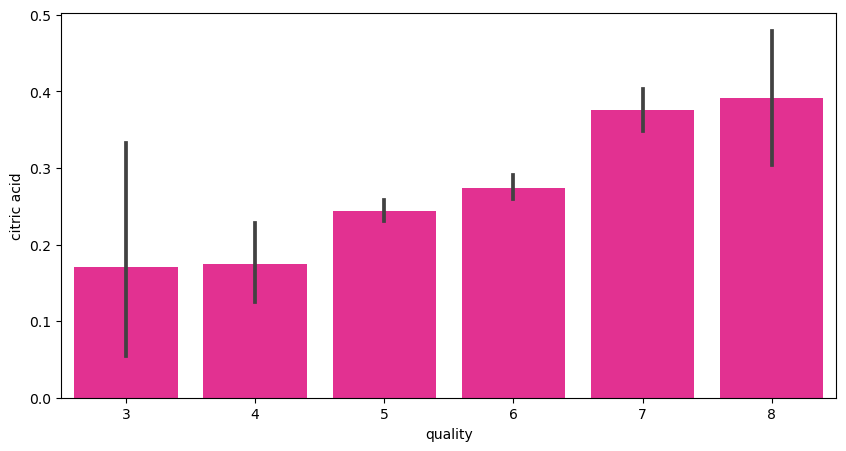

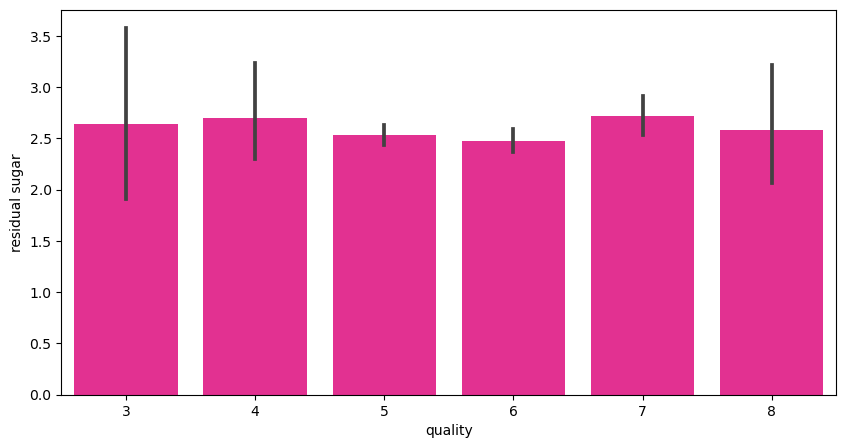

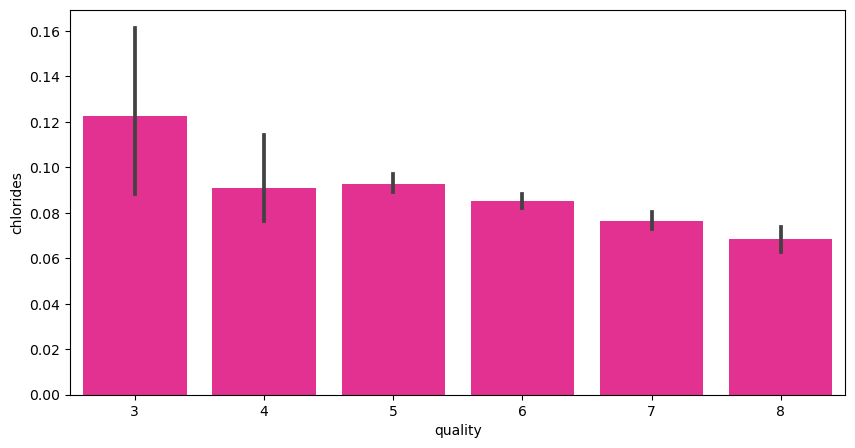

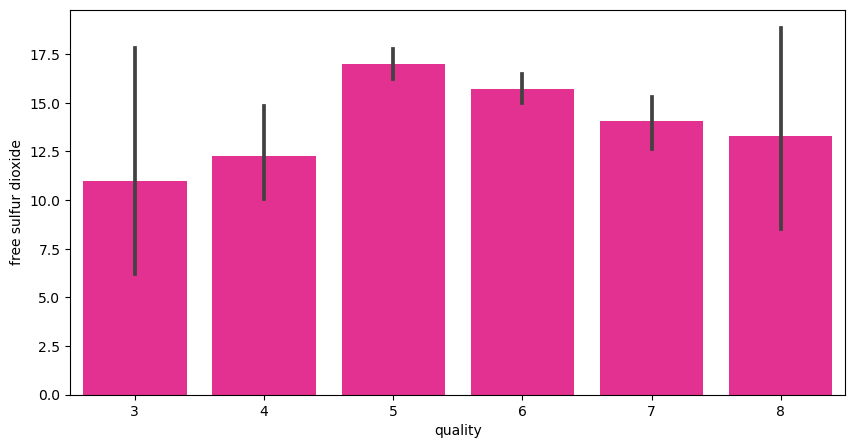

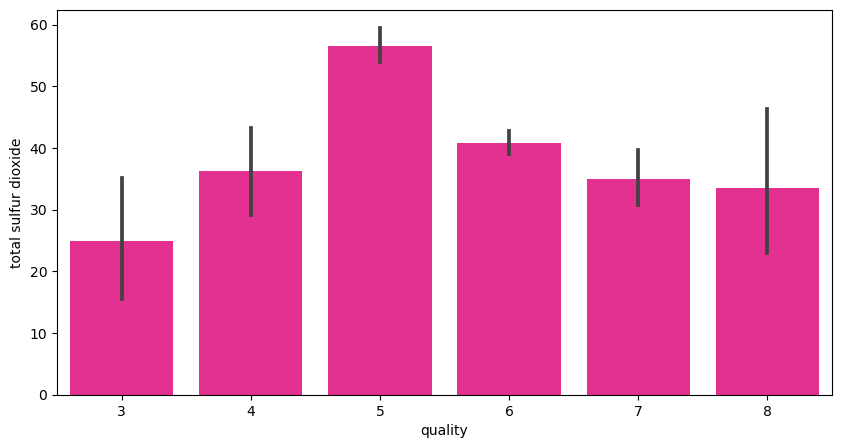

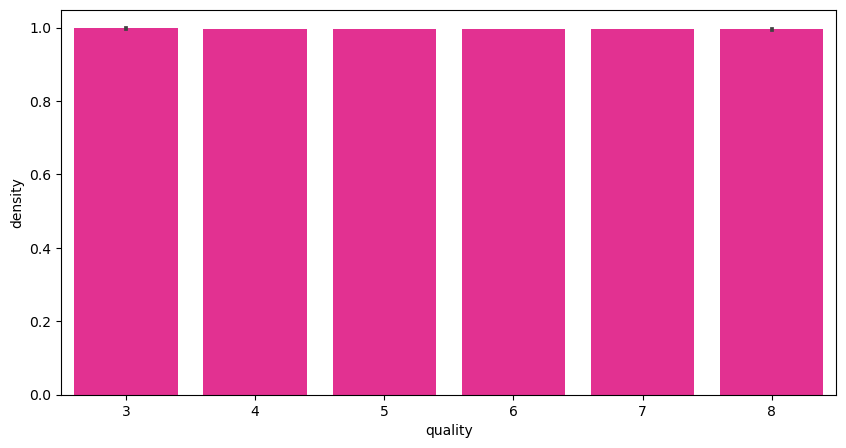

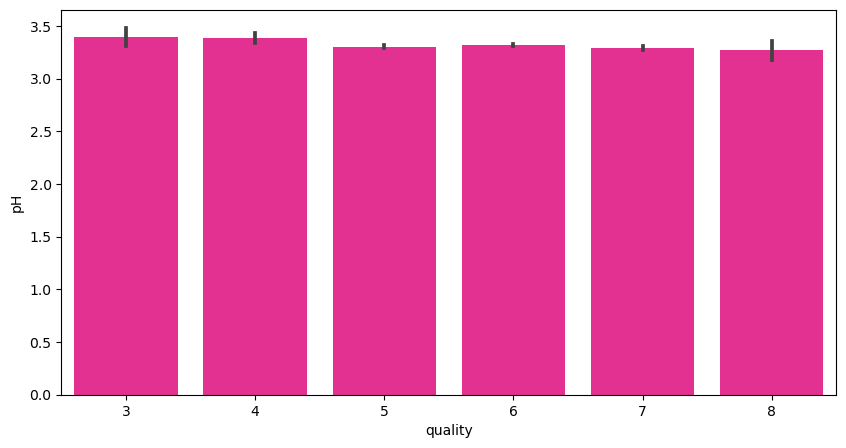

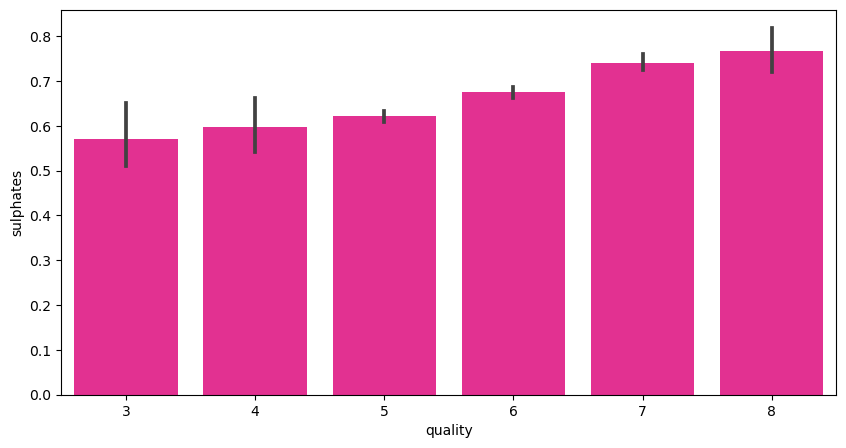

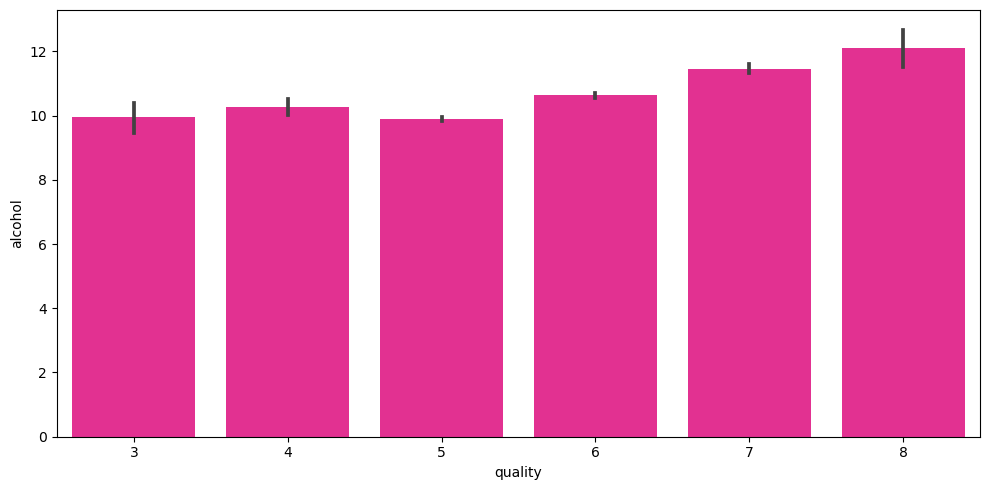

In [44]:
index=0
labels = dataframe['quality']
features = dataframe.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=dataframe, color="deeppink")
plt.tight_layout()
plt.show()

1- fixed acidity vs quality - no fixed pattern
2- volatile acidity vs quality - there is a decreasing trend
3- citric acid vs quality - there is an increasing trend
4- residual sugar vs quality - no fixed pattern
5 -chlorides vs quality - there is a decreasing trend
6 free sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing
7 -total sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing
8- density vs quality - no pattern at all
9- pH vs quality - no pattern at all
10- sulphates vs quality - there is an increasing trend
11- alcohol vs quality - there is an increasing trend

I am here to conclude e can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major 
role.

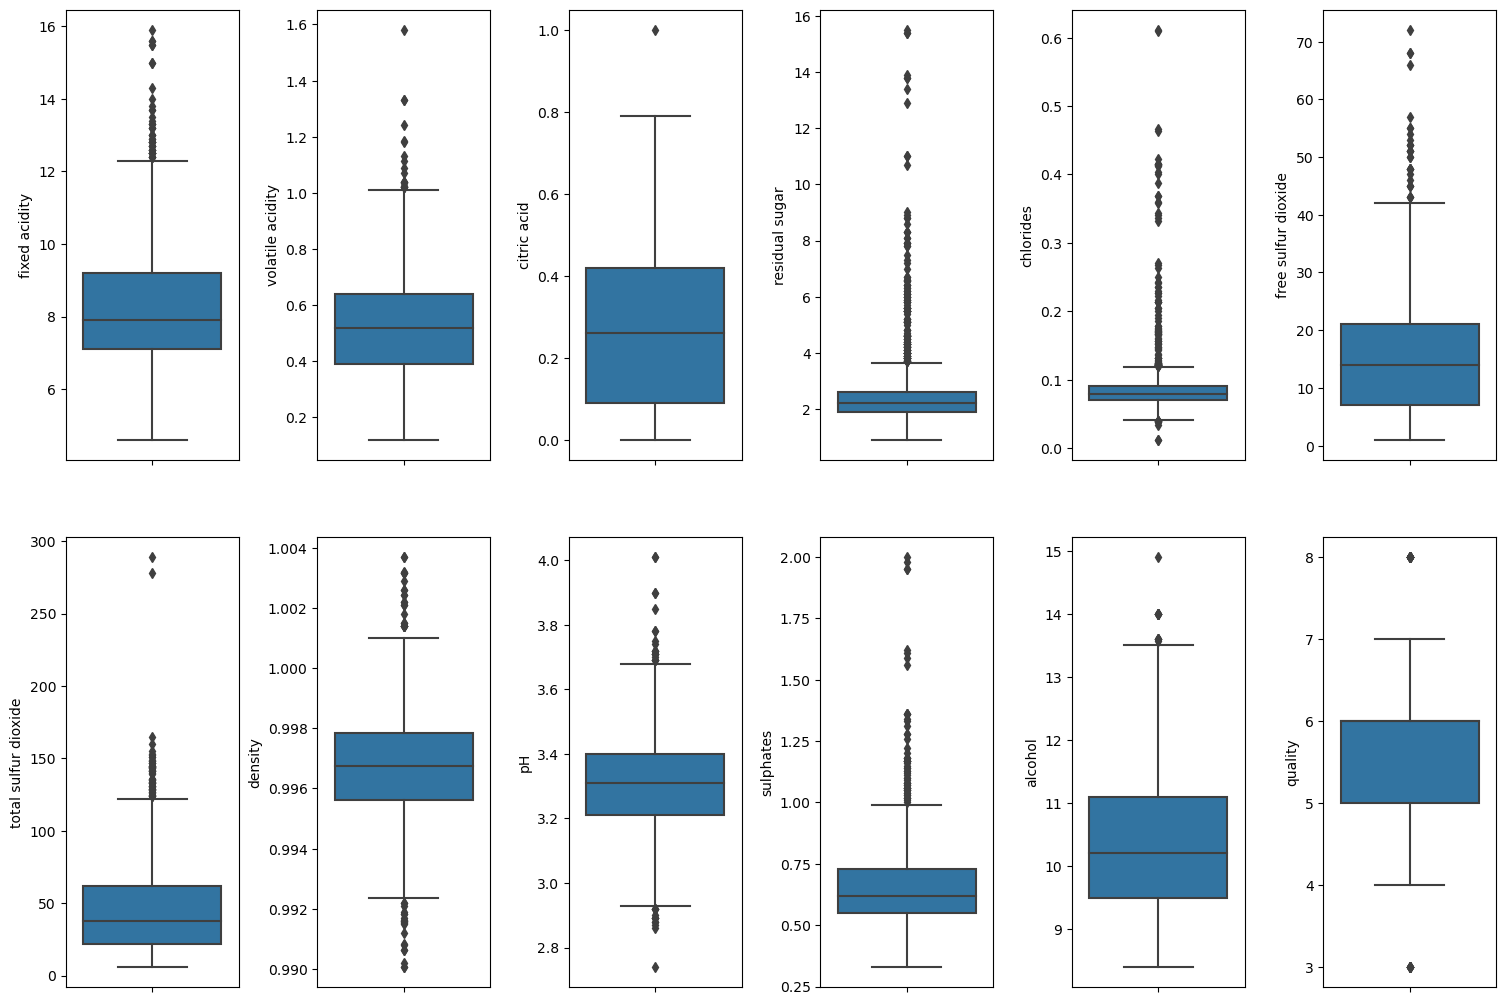

In [46]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in dataframe.items():
    sns.boxplot(y=col, data=dataframe, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [64]:
X = dataframe.drop('quality', axis=1)
Y = dataframe['quality']

 X represents all the feature columns and Y represents the target label column.

class imblance

In [65]:
Y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

above value show the class imbalance that i need to fix with the help of oversampling method

In [70]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

# SOMTE has oversampling method 

In [71]:
Y.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

Resolve class imbalance problem

In [76]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,1.000342
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,1.000348
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,1.000348
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,1.000348
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,1.000342
...,...,...,...,...,...,...,...,...,...,...,...
4081,6.131270,0.511957,0.046468,1.937233,0.049764,29.646790,75.472468,0.991725,3.489021,0.798043,1.000398
4082,9.025774,0.402969,0.483670,1.800000,0.070555,6.851547,15.406189,0.994700,3.230783,0.690000,1.000384
4083,8.084733,0.518448,0.364631,2.392239,0.075230,7.846055,16.846055,0.992699,3.201539,0.715382,1.000391
4084,10.754663,0.588078,0.622117,4.774371,0.082010,7.197082,20.330091,0.998257,3.221330,0.699311,1.000392


In [79]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [80]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.588247,0.469281,-1.353218,-0.573036,-0.286685,-0.251851,-0.086359,0.679973,1.173690,-0.620671,-1.167158
1,-0.347380,1.195138,-1.353218,-0.013469,0.175316,1.180050,1.093140,0.144013,-0.815033,0.115023,-0.780718
2,-0.347380,0.711233,-1.157234,-0.253284,0.049316,0.157264,0.628489,0.251205,-0.430119,-0.068901,-0.780718
3,1.699993,-1.224384,1.390565,-0.573036,-0.307685,0.361821,0.842943,0.787165,-1.071642,-0.498055,-0.780718
4,-0.588247,0.469281,-1.353218,-0.573036,-0.286685,-0.251851,-0.086359,0.679973,1.173690,-0.620671,-1.167158
...,...,...,...,...,...,...,...,...,...,...,...
4081,-1.352236,-0.289008,-1.125543,-0.543273,-0.837648,1.655318,1.395967,-2.576012,1.039107,0.838717,2.278851
4082,0.390742,-0.728507,1.016579,-0.652974,-0.401038,-0.676149,-0.750947,-0.981415,-0.617550,0.176330,1.384878
4083,-0.175922,-0.262835,0.433333,-0.179550,-0.302849,-0.574432,-0.699483,-2.053715,-0.805157,0.331940,1.843780
4084,1.431825,0.017951,1.694913,1.724682,-0.160480,-0.640808,-0.574955,0.925079,-0.678195,0.233412,1.910444


In [86]:
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting 
the label value, getting the accuracy score, cross validation score and the result of difference between the 
accuracy score and cross validation score

In [87]:
model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 58.31295843520783

Classification Report:
               precision    recall  f1-score   support

           3       0.78      0.85      0.81       124
           4       0.53      0.55      0.54       132
           5       0.60      0.52      0.56       141
           6       0.44      0.34      0.38       140
           7       0.44      0.50      0.47       127
           8       0.66      0.75      0.71       154

    accuracy                           0.58       818
   macro avg       0.58      0.58      0.58       818
weighted avg       0.58      0.58      0.58       818

Cross Validation Score: 56.92634810999751

Accuracy Score - Cross Validation Score is 1.3866103252103201


In [88]:
    Support vecter classification
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 78.85085574572128

Classification Report:
               precision    recall  f1-score   support

           3       0.94      1.00      0.97       124
           4       0.77      0.89      0.82       132
           5       0.76      0.66      0.71       141
           6       0.62      0.45      0.52       140
           7       0.74      0.76      0.75       127
           8       0.84      0.98      0.90       154

    accuracy                           0.79       818
   macro avg       0.78      0.79      0.78       818
weighted avg       0.78      0.79      0.78       818

Cross Validation Score: 74.22836245671893

Accuracy Score - Cross Validation Score is 4.62249328900235


In [89]:
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 86.55256723716381

Classification Report:
               precision    recall  f1-score   support

           3       0.98      0.99      0.98       124
           4       0.87      0.98      0.92       132
           5       0.87      0.73      0.79       141
           6       0.75      0.63      0.68       140
           7       0.76      0.91      0.83       127
           8       0.96      0.97      0.96       154

    accuracy                           0.87       818
   macro avg       0.86      0.87      0.86       818
weighted avg       0.86      0.87      0.86       818

Cross Validation Score: 80.66517433630702

Accuracy Score - Cross Validation Score is 5.887392900856796


After comparing all the classification models I have selected Support Vector Classifier as my best model.